# Use Linear Regression to Predict Revenue

In this project, I created a Python notebook for predicting financial revenue of Bank using Linear Regression model of machine learning.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Add date feature using Fastai add_datepart.

- Split our data into train and validation sets to verify our predictions.

- Create Linear Regression model that will be use to predict future bank revenues.

- Train and plot results.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

In [2]:
#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [6]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [7]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'])

---
### Understand the Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


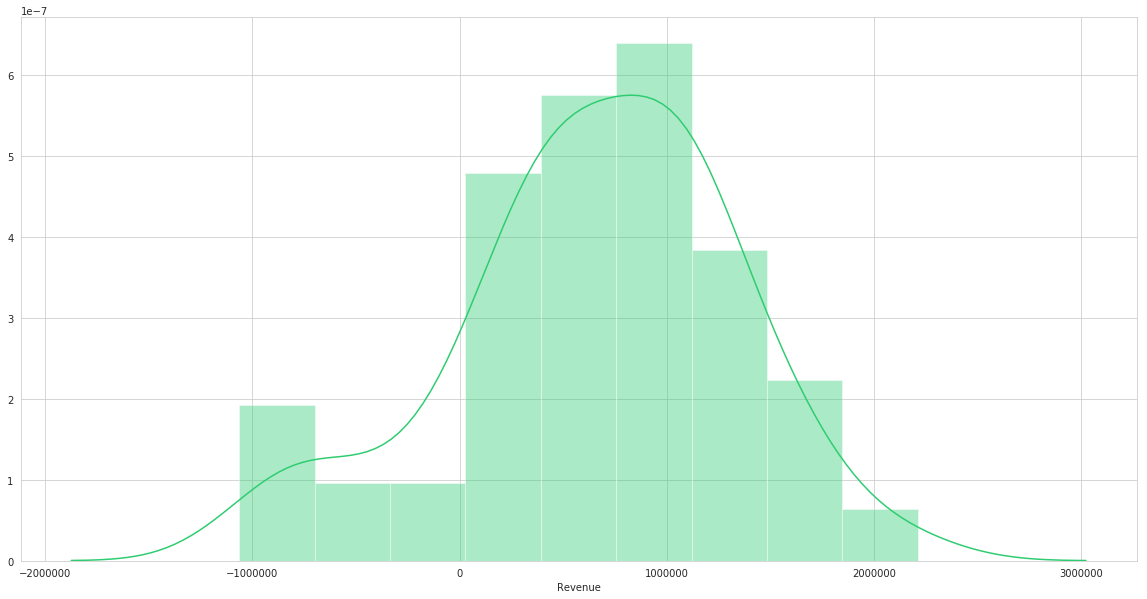

In [9]:
#check the data distribution
sns.distplot(df['Revenue'], color='#2ecc71')

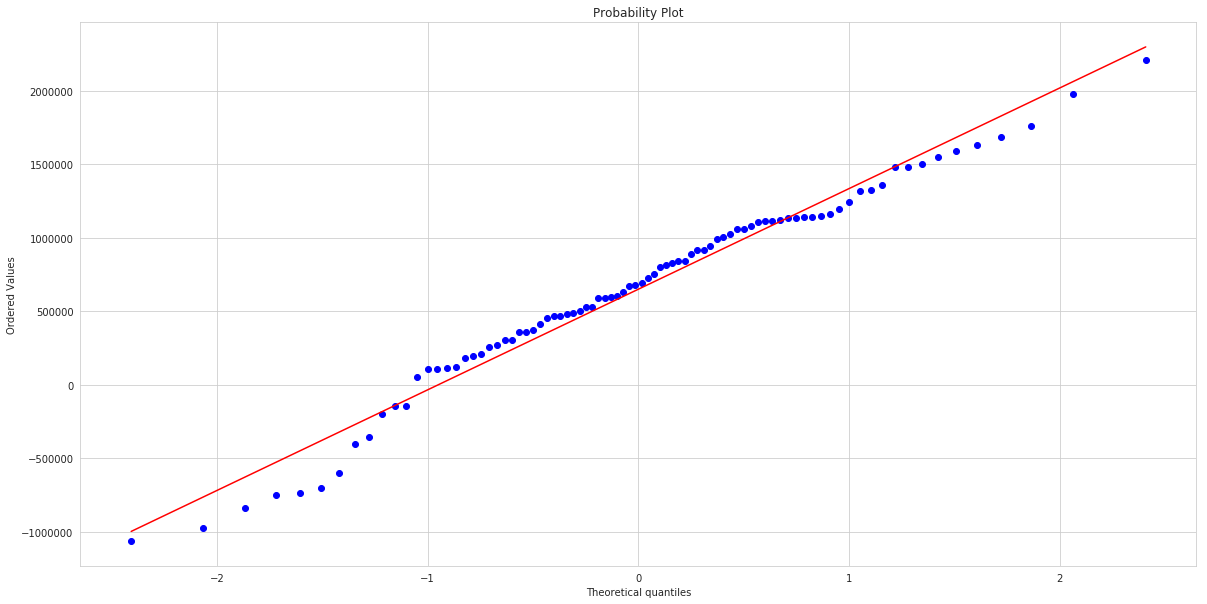

In [10]:
# Probability Plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(df['Revenue'], plot=plt)

In [11]:
#make a copy
data = df.copy()

### Add Features

In [12]:
#import fastai to add_datepart feature
from fastai.structured import  add_datepart

In [13]:
#create features
add_datepart(data, 'Date')
data[:5]

,Revenue,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,"943,690",2009,1,1,1,3,1,False,True,False,True,False,True,1230768000
1,"1,062,565",2009,2,5,1,6,32,False,True,False,False,False,False,1233446400
2,"210,079",2009,3,9,1,6,60,False,True,False,False,False,False,1235865600
3,"-735,286",2009,4,14,1,2,91,False,True,False,True,False,False,1238544000
4,"842,933",2009,5,18,1,4,121,False,True,False,False,False,False,1241136000


In [14]:
#elapsed will be the timestamp
data.drop('Elapsed', axis=1, inplace=True)
data[:5]

,Revenue,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,"943,690",2009,1,1,1,3,1,False,True,False,True,False,True
1,"1,062,565",2009,2,5,1,6,32,False,True,False,False,False,False
2,"210,079",2009,3,9,1,6,60,False,True,False,False,False,False
3,"-735,286",2009,4,14,1,2,91,False,True,False,True,False,False
4,"842,933",2009,5,18,1,4,121,False,True,False,False,False,False


In [15]:
#split into train and validation
train = data[:72]
valid = data[72:]

In [16]:
#assign the feature and target
x_train = train.drop('Revenue', axis=1)
y_train = train['Revenue']
x_valid = valid.drop('Revenue', axis=1)
y_valid = valid['Revenue']

In [17]:
#create linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
#train the model with our data
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#make predictions
preds = model.predict(x_valid)

In [20]:
#find the rmse
rmse=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rmse

621152.5235135274

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


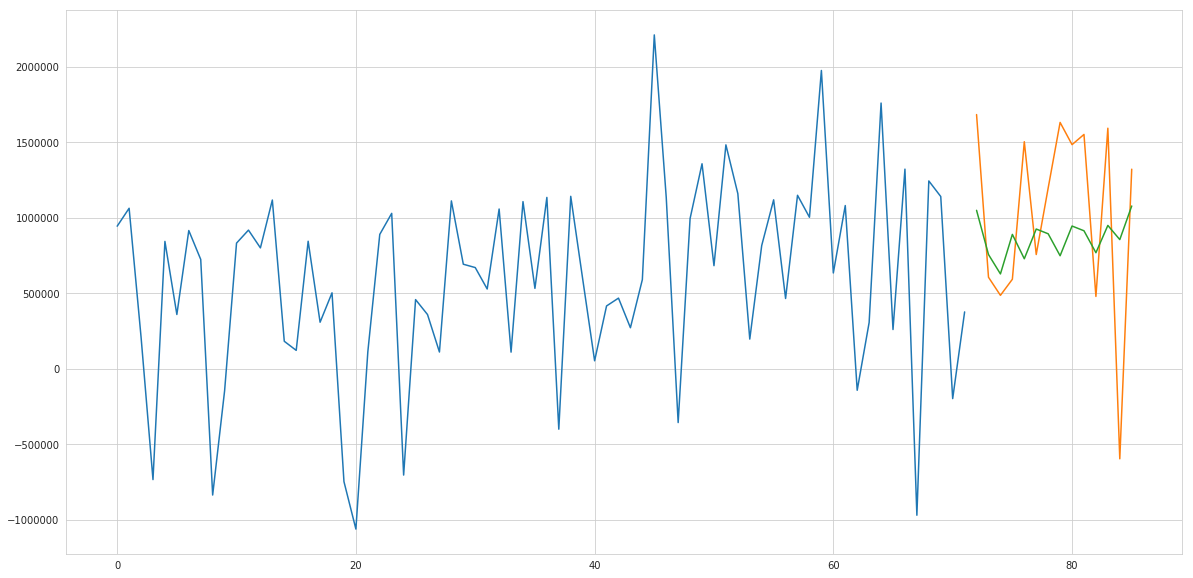

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = data[72:].index
train.index = data[:72].index

plt.plot(train['Revenue'])
plt.plot(valid[['Revenue', 'Predictions']])